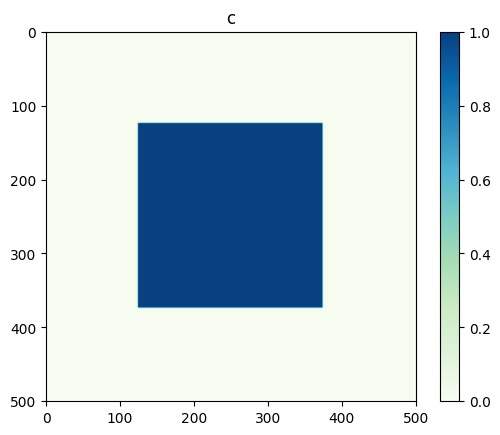

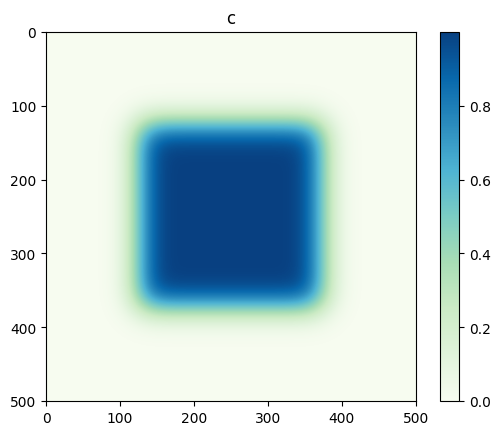

In [1]:
import pyphasefield.Engines as engines

sim = engines.Diffusion(dimensions=[500, 500])

#initialize non-array parameters
sim.set_framework("CPU_SERIAL") #"CPU_SERIAL", "GPU_SERIAL" (GPU_SERIAL requires numba)
sim.set_dx(1.)
sim.set_dt(0.1)
sim.set_save_path("data/diffusion_test")
sim.set_autosave_flag(True)
sim.set_autosave_save_images_flag(True)
sim.set_autosave_rate(2000)
sim.set_boundary_conditions("PERIODIC")

data = {
    "D":1.
}
sim.set_user_data(data)

#initialize simulation arrays, all parameter changes should be BEFORE this point!
sim.initialize_fields_and_imported_data()

#change array data here, for custom simulations

#set the field values manually using numpy slicing
sim.fields[0].data[:] = 0.
length = sim.dimensions[0]
width = sim.dimensions[1]
sim.fields[0].data[length // 4:3 * length // 4, width // 4:3 * width // 4] = 1.



#initial conditions
sim.plot_simulation()

#run simulation
sim.simulate(2000)

#final conditions
sim.plot_simulation()